## q-1
Implement Lasso regression also known as L1 regularisation and plot graph between
regularisation coefficient λ and error

In [15]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import sklearn as sk
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from pylab import *
import matplotlib
import matplotlib.pyplot as plt

###### loading dataset and preprocessing

In [2]:
df = pd.read_csv("../input_data/AdmissionDataset/data.csv")
X = df.drop(['Serial No.','Chance of Admit '],axis=1)
Y = df['Chance of Admit ']
col_names = [i for i in X]
X = pd.DataFrame(preprocessing.scale(X), columns = col_names)

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

/home/priyendu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


###### splitting data in training and validation

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

###### using inbuilt linear regression model

In [4]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.01)
clf.fit(X_train, Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

###### appending a column of ones at the beginning

In [5]:
X_train1 = X_train.reset_index(drop=True)
Y_train1 = Y_train.reset_index(drop=True)

ones = pd.DataFrame(1,index=np.arange(X_train.shape[0]),columns=["ones"])
X_train1 = pd.concat([ones, X_train1],axis=1)
X_train1 = np.array(X_train1)
Y_train1 = np.array(Y_train1).reshape(X_train1.shape[0],1)
print X_train1[0]

[1.         0.74694876 0.8040373  0.76676395 0.6438663  1.12271354
 0.98933293 0.89845919]


###### initializing parameters for gradient descent

In [6]:
theta = np.zeros([1,8])
alpha = 0.01
iterations = 1000

###### method to calculate values of theta using gradient descent

In [7]:
costs = []
def gradientDescent(X,Y,theta,it,alpha,lamb):
    for i in range(it):
        theta = theta - (alpha/len(X)) * np.sum(X * (np.matmul(X, theta.T) - Y) + lamb*np.sign(theta), axis=0) 
    return theta

lamb = 0.01
g = gradientDescent(X_train1,Y_train1,theta,iterations,alpha,lamb)
theta_list = g[0]

In [8]:
print theta_list

print(clf.intercept_)  
print(clf.coef_)

[0.7116448  0.02472343 0.01778515 0.00767612 0.00427447 0.00571567
 0.0599162  0.00863216]
0.72212088580636
[0.01848854 0.01278165 0.00677828 0.00349458 0.00447826 0.07250967
 0.00880272]


###### method to predict values for test_data

In [9]:
def predict(X_test):
    Y_pred=[]
    for index,row in X_test.iterrows():
        row=list(row)
        y1=0
        for i in range(1,8):
            y1=y1+theta_list[i]*row[i-1]
        y1=y1+theta_list[0]
        Y_pred.append(y1)
    return Y_pred
pred = predict(X_test)

In [10]:
# print theta_list
# print r2_score(list(Y_test),pred)

In [11]:
lamb = 0.01
lamb_list = []
train_error = []
test_error = []
sys_train_error = []
sys_test_error = []
flag=1
while lamb < 1:
    print lamb
    theta = np.zeros([1,8])
    g = gradientDescent(X_train1,Y_train1,theta,iterations,alpha,lamb)
    theta_list = g[0]
    
    clf = linear_model.Lasso(alpha=lamb)
    clf.fit(X_train, Y_train)
    
    pred = clf.predict(X_test)
    sys_test_err = mean_squared_error(Y_test, pred)
    sys_test_error.append(sys_test_err)
    
    pred = clf.predict(X_train)
    sys_train_err = mean_squared_error(Y_train, pred)
    sys_train_error.append(sys_train_err)
    
    pred = predict(X_test)
    test_err = mean_squared_error(Y_test, pred)
    test_error.append(test_err)
    
    pred = predict(X_train)
    train_err = mean_squared_error(Y_train, pred)
    train_error.append(train_err)
    
    lamb_list.append(lamb)
    lamb+=0.01
#     if lamb > -5 and flag==1:
#         lamb=0.01
#         flag=0
#     if lamb>=0:
#         lamb*=2
#     else:
#         lamb/=2
    
    
print len(lamb_list)
print len(test_error)
print len(train_error)

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
99
99
99


system : lambda vs error


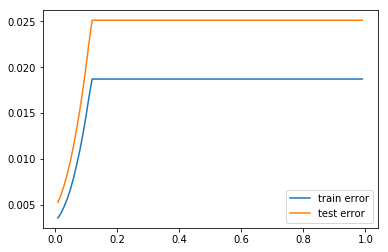

In [12]:
# fig,ax = plt.subplots()
plt.plot(lamb_list, sys_train_error, label="train error")
plt.plot(lamb_list, sys_test_error, label="test error")
plt.legend()
print "system : lambda vs error"
plt.show()

my model : lambda vs error


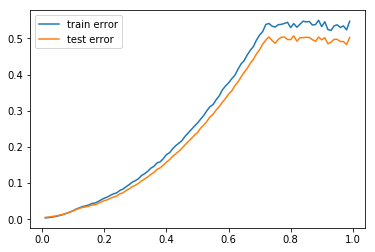

In [13]:
# fig,ax = plt.subplots()
plt.plot(lamb_list, train_error, label="train error")
plt.plot(lamb_list, test_error, label="test error")
plt.legend()
print "my model : lambda vs error"
plt.show()

###### testing from file